In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt

In [2]:
grib_arrays = xr.open_dataset("/datasets/grib2_data/2015/wnd10m.cdas1.201509.grb2",engine='cfgrib')
grib_arrays

/usr/local/lib/python3.10/dist-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


<xarray.Dataset> Size: 236MB
Dimensions:            (time: 120, step: 6, latitude: 200, longitude: 205)
Coordinates:
  * time               (time) datetime64[ns] 960B 2015-09-01 ... 2015-09-30T1...
  * step               (step) timedelta64[ns] 48B 01:00:00 02:00:00 ... 06:00:00
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 2kB 41.81 41.6 41.4 ... 1.329 1.124
  * longitude          (longitude) float64 2kB 98.18 98.39 98.59 ... 139.7 139.9
    valid_time         (time, step) datetime64[ns] 6kB ...
Data variables:
    u                  (time, step, latitude, longitude) float32 118MB ...
    v                  (time, step, latitude, longitude) float32 118MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             60
    GRIB_centreDescription:  National Center for Atmospheric Research 
    GRIB_subCentre:          1
    Conventions:             CF-1.7
    institution:             National Center for Atmospheric Research 
    history:                 2024-08-03T11:41 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
i = 3
[grib_arrays['u'][0,i].min().values, grib_arrays['u'][0,i].max().values,grib_arrays['u'][0,i].mean().values]

[array(-12.66, dtype=float32),
 array(10.4, dtype=float32),
 array(-0.06031559, dtype=float32)]

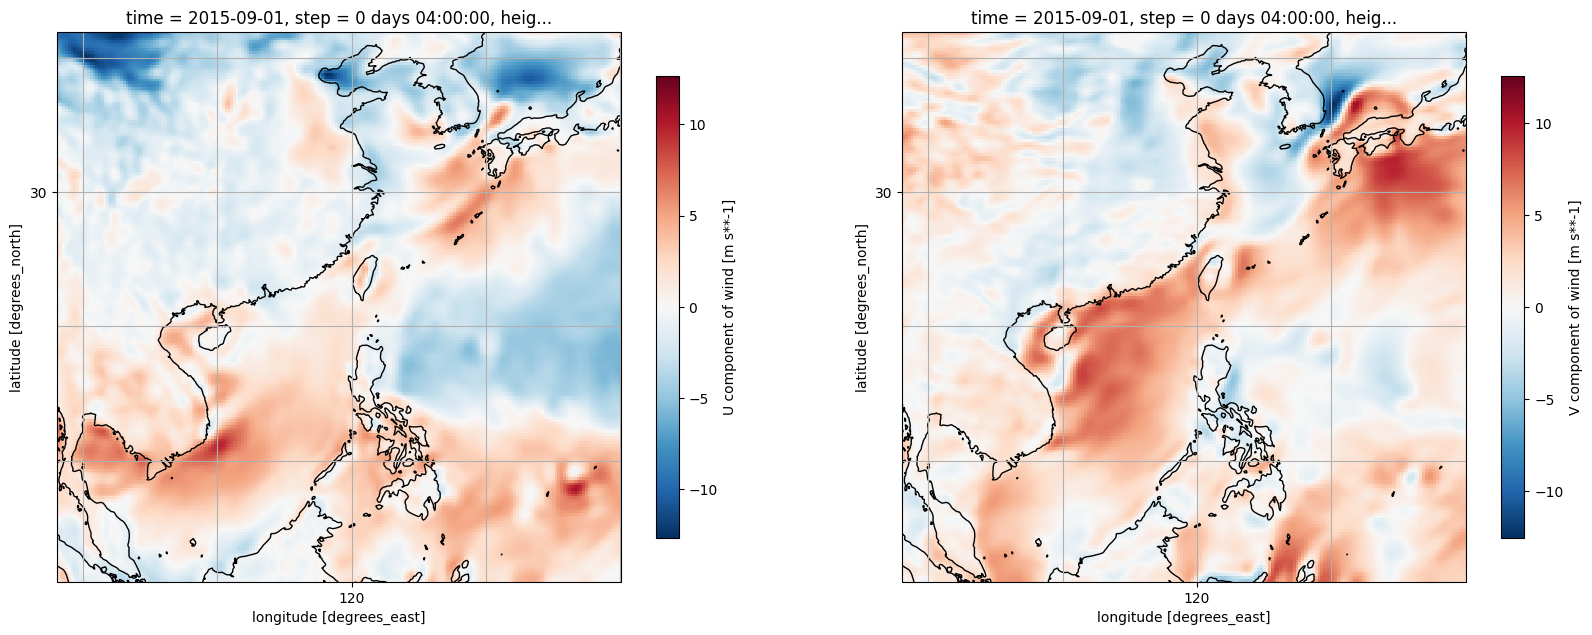

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

ax1.coastlines(resolution="50m")
# 添加经纬度坐标
ax1.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.gridlines(draw_labels=False)
plot1 = grib_arrays['u'][0,3,:,:].plot(ax=ax1, transform=ccrs.PlateCarree(),cbar_kwargs={"shrink": 0.6})

ax2.coastlines(resolution="50m")
# 添加经纬度坐标
ax2.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())
ax2.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax2.gridlines(draw_labels=False)
plot2 = grib_arrays['v'][0,3,:,:].plot(ax=ax2, transform=ccrs.PlateCarree(),cbar_kwargs={"shrink": 0.6})